In [51]:
import pandas as pd
import panel as pn
import seaborn as sns
import sklearn as skl
from sklearn.ensemble import IsolationForest
%matplotlib inline
import holoviews as hv

In [52]:
import requests
import io

# Downloading the csv
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df

#                   Name   Type 1  Type 2  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison  45      49       49   
1      2                Ivysaur    Grass  Poison  60      62       63   
2      3               Venusaur    Grass  Poison  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison  80     100      123   
4      4             Charmander     Fire     NaN  39      52       43   
..   ...                    ...      ...     ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark  80     160       60   
799  721              Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 12 columns]

In [53]:
df.describe()

#          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750   69.258750   79.001250   73.842500   72.820000   71.902500   
std    208.343798   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.000000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    184.750000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    364.500000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    539.250000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    721.000000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  
count  800.000000   800.00000  
mean    68.277500     3.32375  
std     29.060474     1.66129  
min      5.000000     1.00000  
25%     45.000000     2.00000  
50%     65.000000     3.00000  
75%     90.000000     5.00000  
max    180.000000     6.00000

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


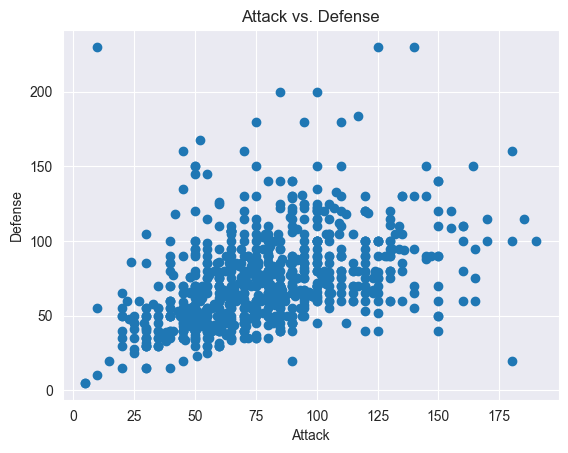

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df['Attack'], df['Defense'])
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack vs. Defense')
plt.show()

In [56]:
#import panel as pn
#import hvplot.pandas  # hvPlot extension for pandas DataFrames

# Create a scatter plot using hvPlot
scatter_plot = df.hvplot.scatter(x='Attack', y='Defense', hover_cols=['Name'], xlabel='Attack', ylabel='Defense',
                                 title='Attack vs. Defense', marker='o', s=100, color='blue', aspect=1 )

# Wrap the hvPlot plot in a Panel object for better layout control
# TODO figure out how to make a panel object in pycharm
scatter_plot_panel = pn.panel(scatter_plot)

# Display the Panel plot
#catter_plot_panel.show()
scatter_plot

:Scatter   [Attack]   (Defense,Name)

array([[<AxesSubplot:xlabel='#', ylabel='#'>,
        <AxesSubplot:xlabel='HP', ylabel='#'>,
        <AxesSubplot:xlabel='Attack', ylabel='#'>,
        <AxesSubplot:xlabel='Defense', ylabel='#'>,
        <AxesSubplot:xlabel='Sp. Atk', ylabel='#'>,
        <AxesSubplot:xlabel='Sp. Def', ylabel='#'>,
        <AxesSubplot:xlabel='Speed', ylabel='#'>,
        <AxesSubplot:xlabel='Generation', ylabel='#'>],
       [<AxesSubplot:xlabel='#', ylabel='HP'>,
        <AxesSubplot:xlabel='HP', ylabel='HP'>,
        <AxesSubplot:xlabel='Attack', ylabel='HP'>,
        <AxesSubplot:xlabel='Defense', ylabel='HP'>,
        <AxesSubplot:xlabel='Sp. Atk', ylabel='HP'>,
        <AxesSubplot:xlabel='Sp. Def', ylabel='HP'>,
        <AxesSubplot:xlabel='Speed', ylabel='HP'>,
        <AxesSubplot:xlabel='Generation', ylabel='HP'>],
       [<AxesSubplot:xlabel='#', ylabel='Attack'>,
        <AxesSubplot:xlabel='HP', ylabel='Attack'>,
        <AxesSubplot:xlabel='Attack', ylabel='Attack'>,
        <AxesSubplot:

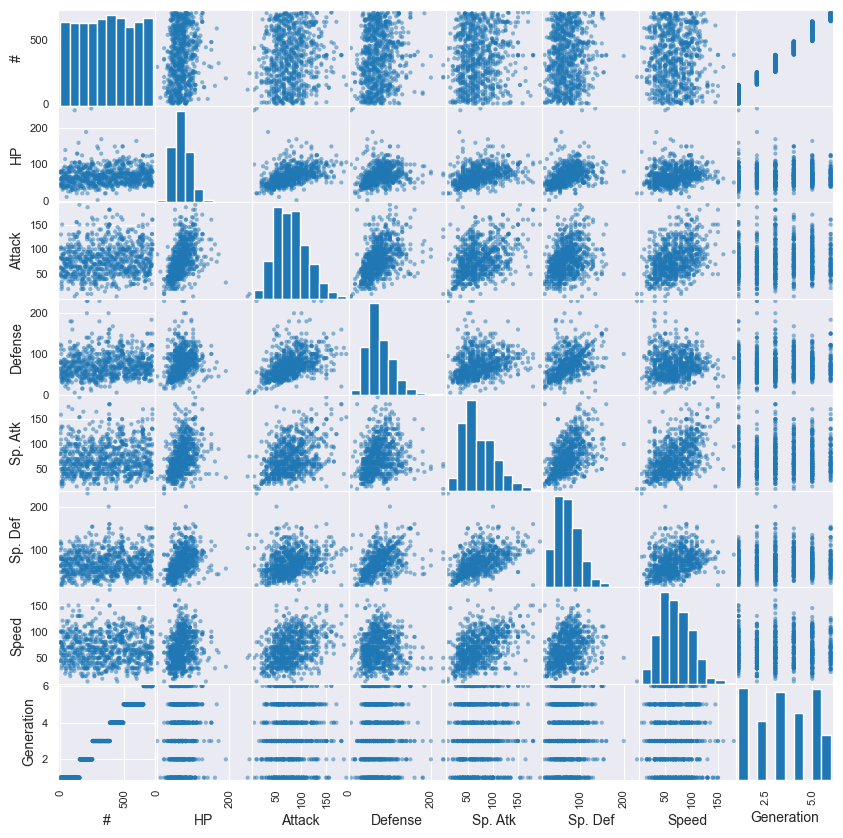

In [57]:
# Get the list of numeric column names
# TODO adjust so that it only includes the relevant ones
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Create a matrix of scatter plots for all numeric columns
scatter_matrix = pd.plotting.scatter_matrix(df[numeric_columns], figsize=(10, 10))

# Display the scatter matrix using hvplot
#scatter_matrix_hv = hvplot.render(scatter_matrix)

# Show the scatter matrix
scatter_matrix

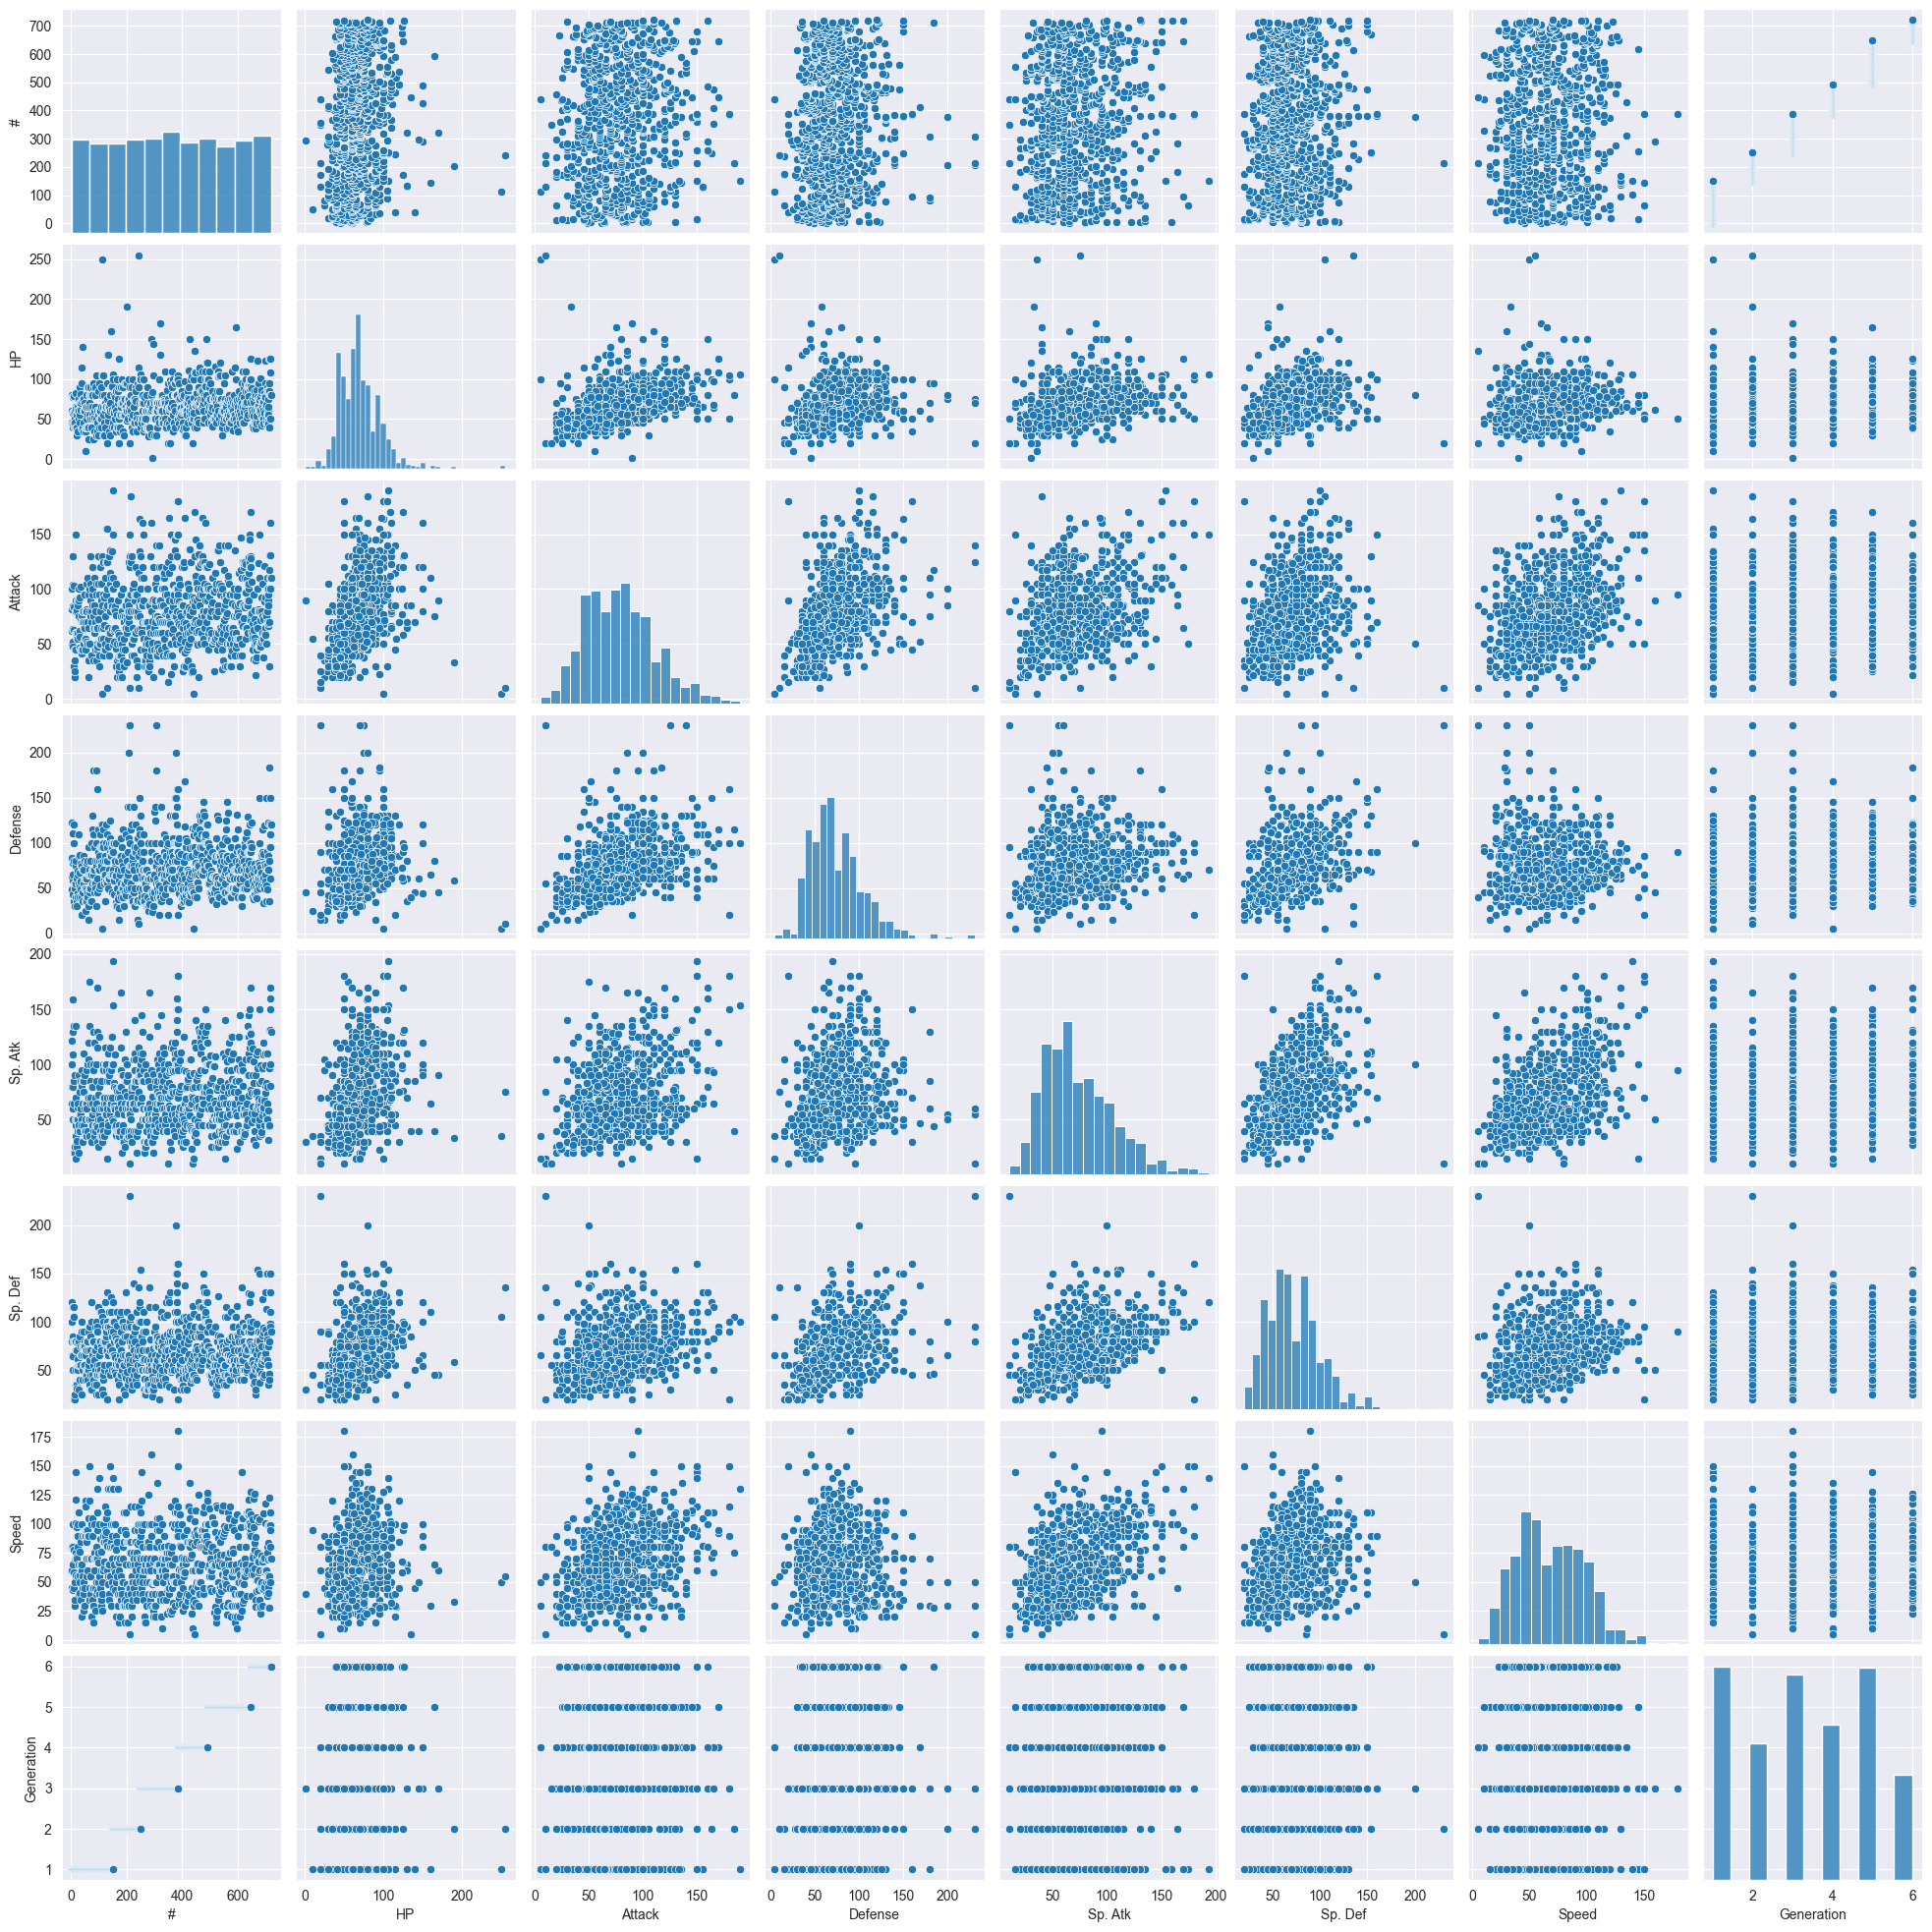

In [58]:
sns.pairplot(df[numeric_columns])

/Users/ivysuar/PycharmProjects/PokemonBalance/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


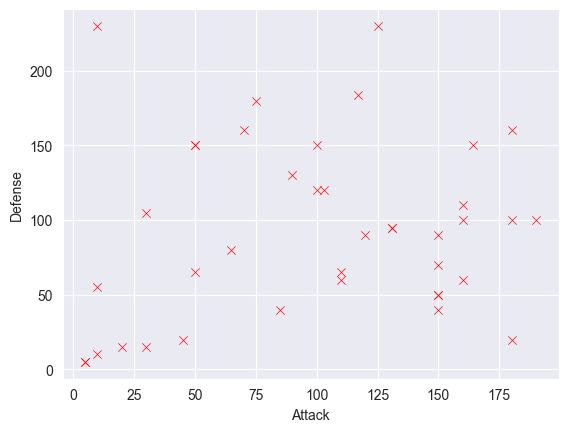

In [59]:
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model on the numeric columns
model.fit(df[numeric_columns])

# Predict the outliers
df['outlier'] = model.predict(df[numeric_columns])

# Filter out the outliers
outliers = df[df['outlier'] == -1]

# Mark the outliers on the pair plot
sns.scatterplot(x='Attack', y='Defense', data=outliers, color='red', marker='x')

# Show the plot
plt.show()

In [60]:
outliers

#                     Name   Type 1    Type 2   HP  Attack  Defense  \
12     9  BlastoiseMega Blastoise    Water       NaN   79     103      120   
19    15    BeedrillMega Beedrill      Bug    Poison   65     150       40   
44    39               Jigglypuff   Normal     Fairy  115      45       20   
68    63                     Abra  Psychic       NaN   25      20       15   
71    65    AlakazamMega Alakazam  Psychic       NaN   55      50       65   
87    80      SlowbroMega Slowbro    Water   Psychic   95      75      180   
102   94        GengarMega Gengar    Ghost    Poison   60      65       80   
121  113                  Chansey   Normal       NaN  250       5        5   
139  129                 Magikarp    Water       NaN   20      10       55   
155  143                  Snorlax   Normal       NaN  160     110       65   
163  150      MewtwoMega Mewtwo X  Psychic  Fighting  106     190      100   
164  150      MewtwoMega Mewtwo Y  Psychic       NaN  106     150       70   
188  174                Igglybuff   Normal     Fairy   90      30       15   
224  208      SteelixMega Steelix    Steel    Ground   75     125      230   
230  213                  Shuckle      Bug      Rock   20      10      230   
261  242                  Blissey   Normal       NaN  255      10       10   
268  248  TyranitarMega Tyranitar     Rock      Dark  100     164      150   
269  249                    Lugia  Psychic    Flying  106      90      130   
313  289                  Slaking   Normal       NaN  150     160      100   
422  382      KyogrePrimal Kyogre    Water       NaN  100     150       90   
424  383    GroudonPrimal Groudon   Ground      Fire  100     180      160   
426  384    RayquazaMega Rayquaza   Dragon    Flying  105     180      100   
428  386       DeoxysNormal Forme  Psychic       NaN   50     150       50   
429  386       DeoxysAttack Forme  Psychic       NaN   50     180       20   
430  386      DeoxysDefense Forme  Psychic       NaN   50      70      160   
488  440                  Happiny   Normal       NaN  100       5        5   
495  446                 Munchlax   Normal       NaN  135      85       40   
544  487    GiratinaAltered Forme    Ghost    Dragon  150     100      120   
616  555       DarmanitanZen Mode     Fire   Psychic  105      30      105   
712  646       KyuremWhite Kyurem   Dragon       Ice  125     120       90   
750  681     AegislashBlade Forme    Steel     Ghost   60     150       50   
751  681    AegislashShield Forme    Steel     Ghost   60      50      150   
773  703                  Carbink     Rock     Fairy   50      50      150   
789  713                  Avalugg      Ice       NaN   95     117      184   
792  716                  Xerneas    Fairy       NaN  126     131       95   
793  717                  Yveltal     Dark    Flying  126     131       95   
795  719                  Diancie     Rock     Fairy   50     100      150   
796  719      DiancieMega Diancie     Rock     Fairy   50     160      110   
797  720      HoopaHoopa Confined  Psychic     Ghost   80     110       60   
798  720       HoopaHoopa Unbound  Psychic      Dark   80     160       60   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  outlier  
12       135      115     78           1      False       -1  
19        15       80    145           1      False       -1  
44        45       25     20           1      False       -1  
68       105       55     90           1      False       -1  
71       175       95    150           1      False       -1  
87       130       80     30           1      False       -1  
102      170       95    130           1      False       -1  
121       35      105     50           1      False       -1  
139       15       20     80           1      False       -1  
155       65      110     30           1      False       -1  
163      154      100    130           1       True       -1  
164      194      120    140           1       True 

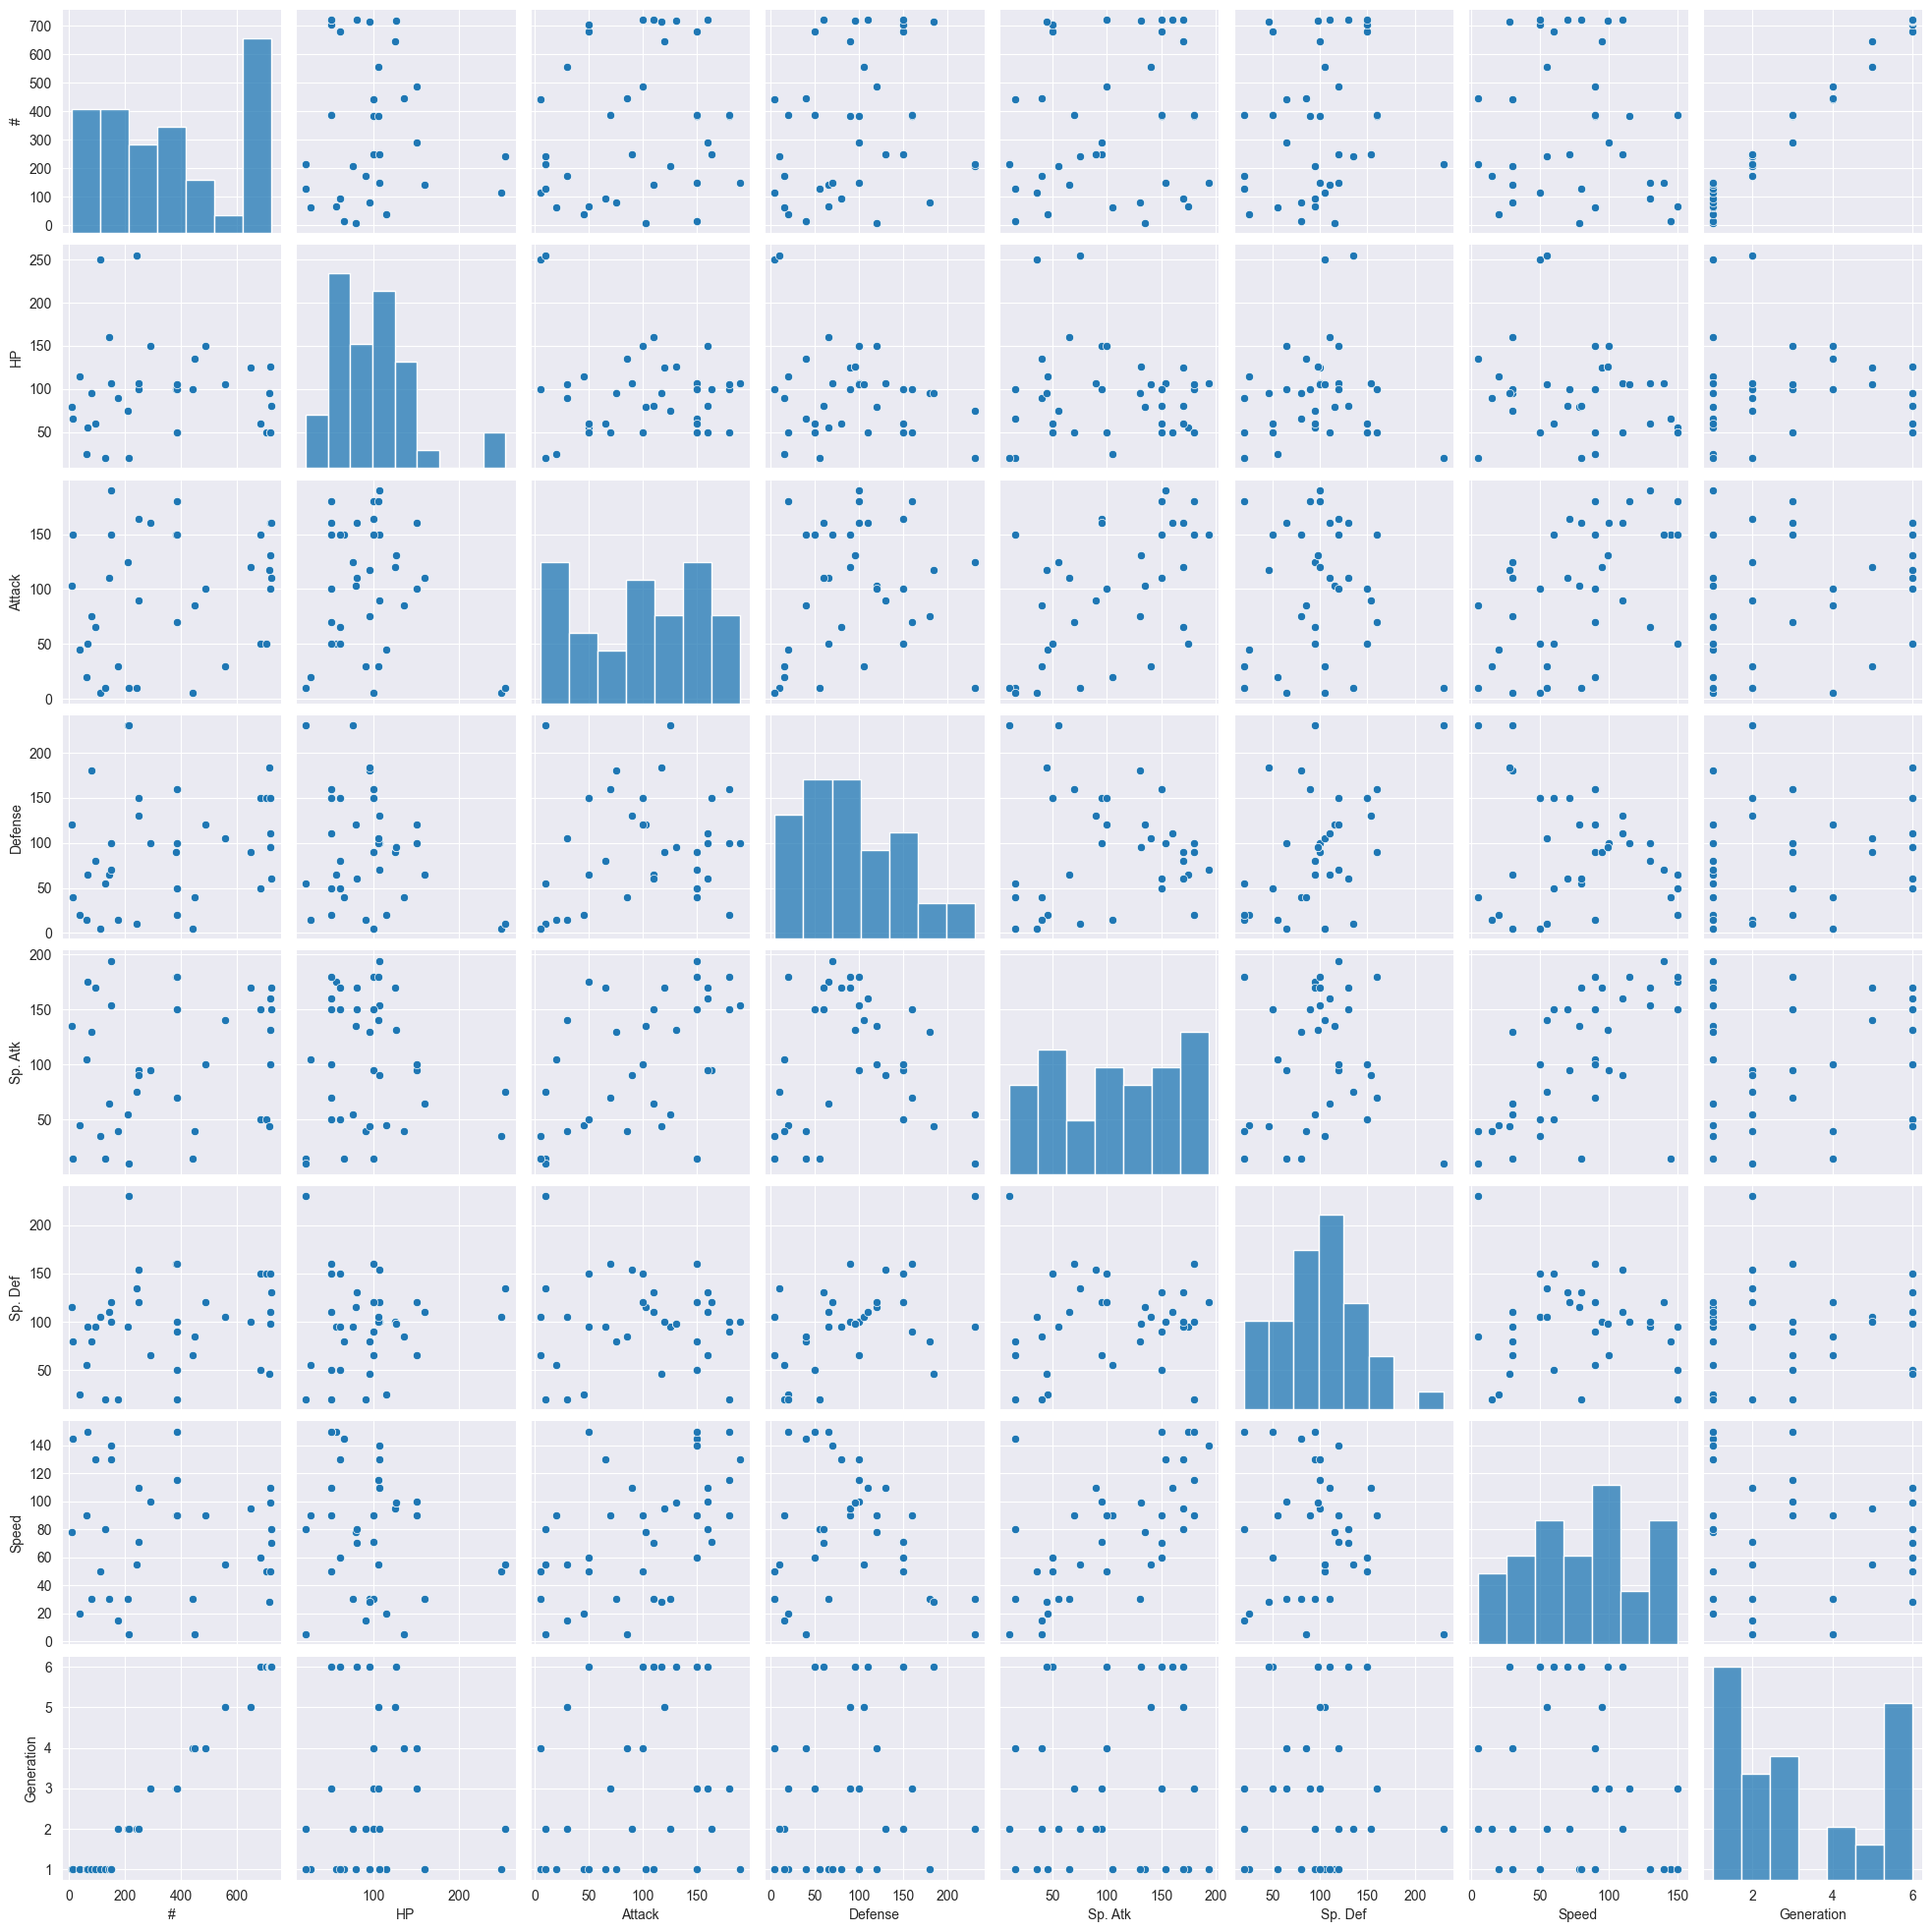

In [61]:
sns.pairplot(outliers[numeric_columns])

/Users/ivysuar/PycharmProjects/PokemonBalance/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


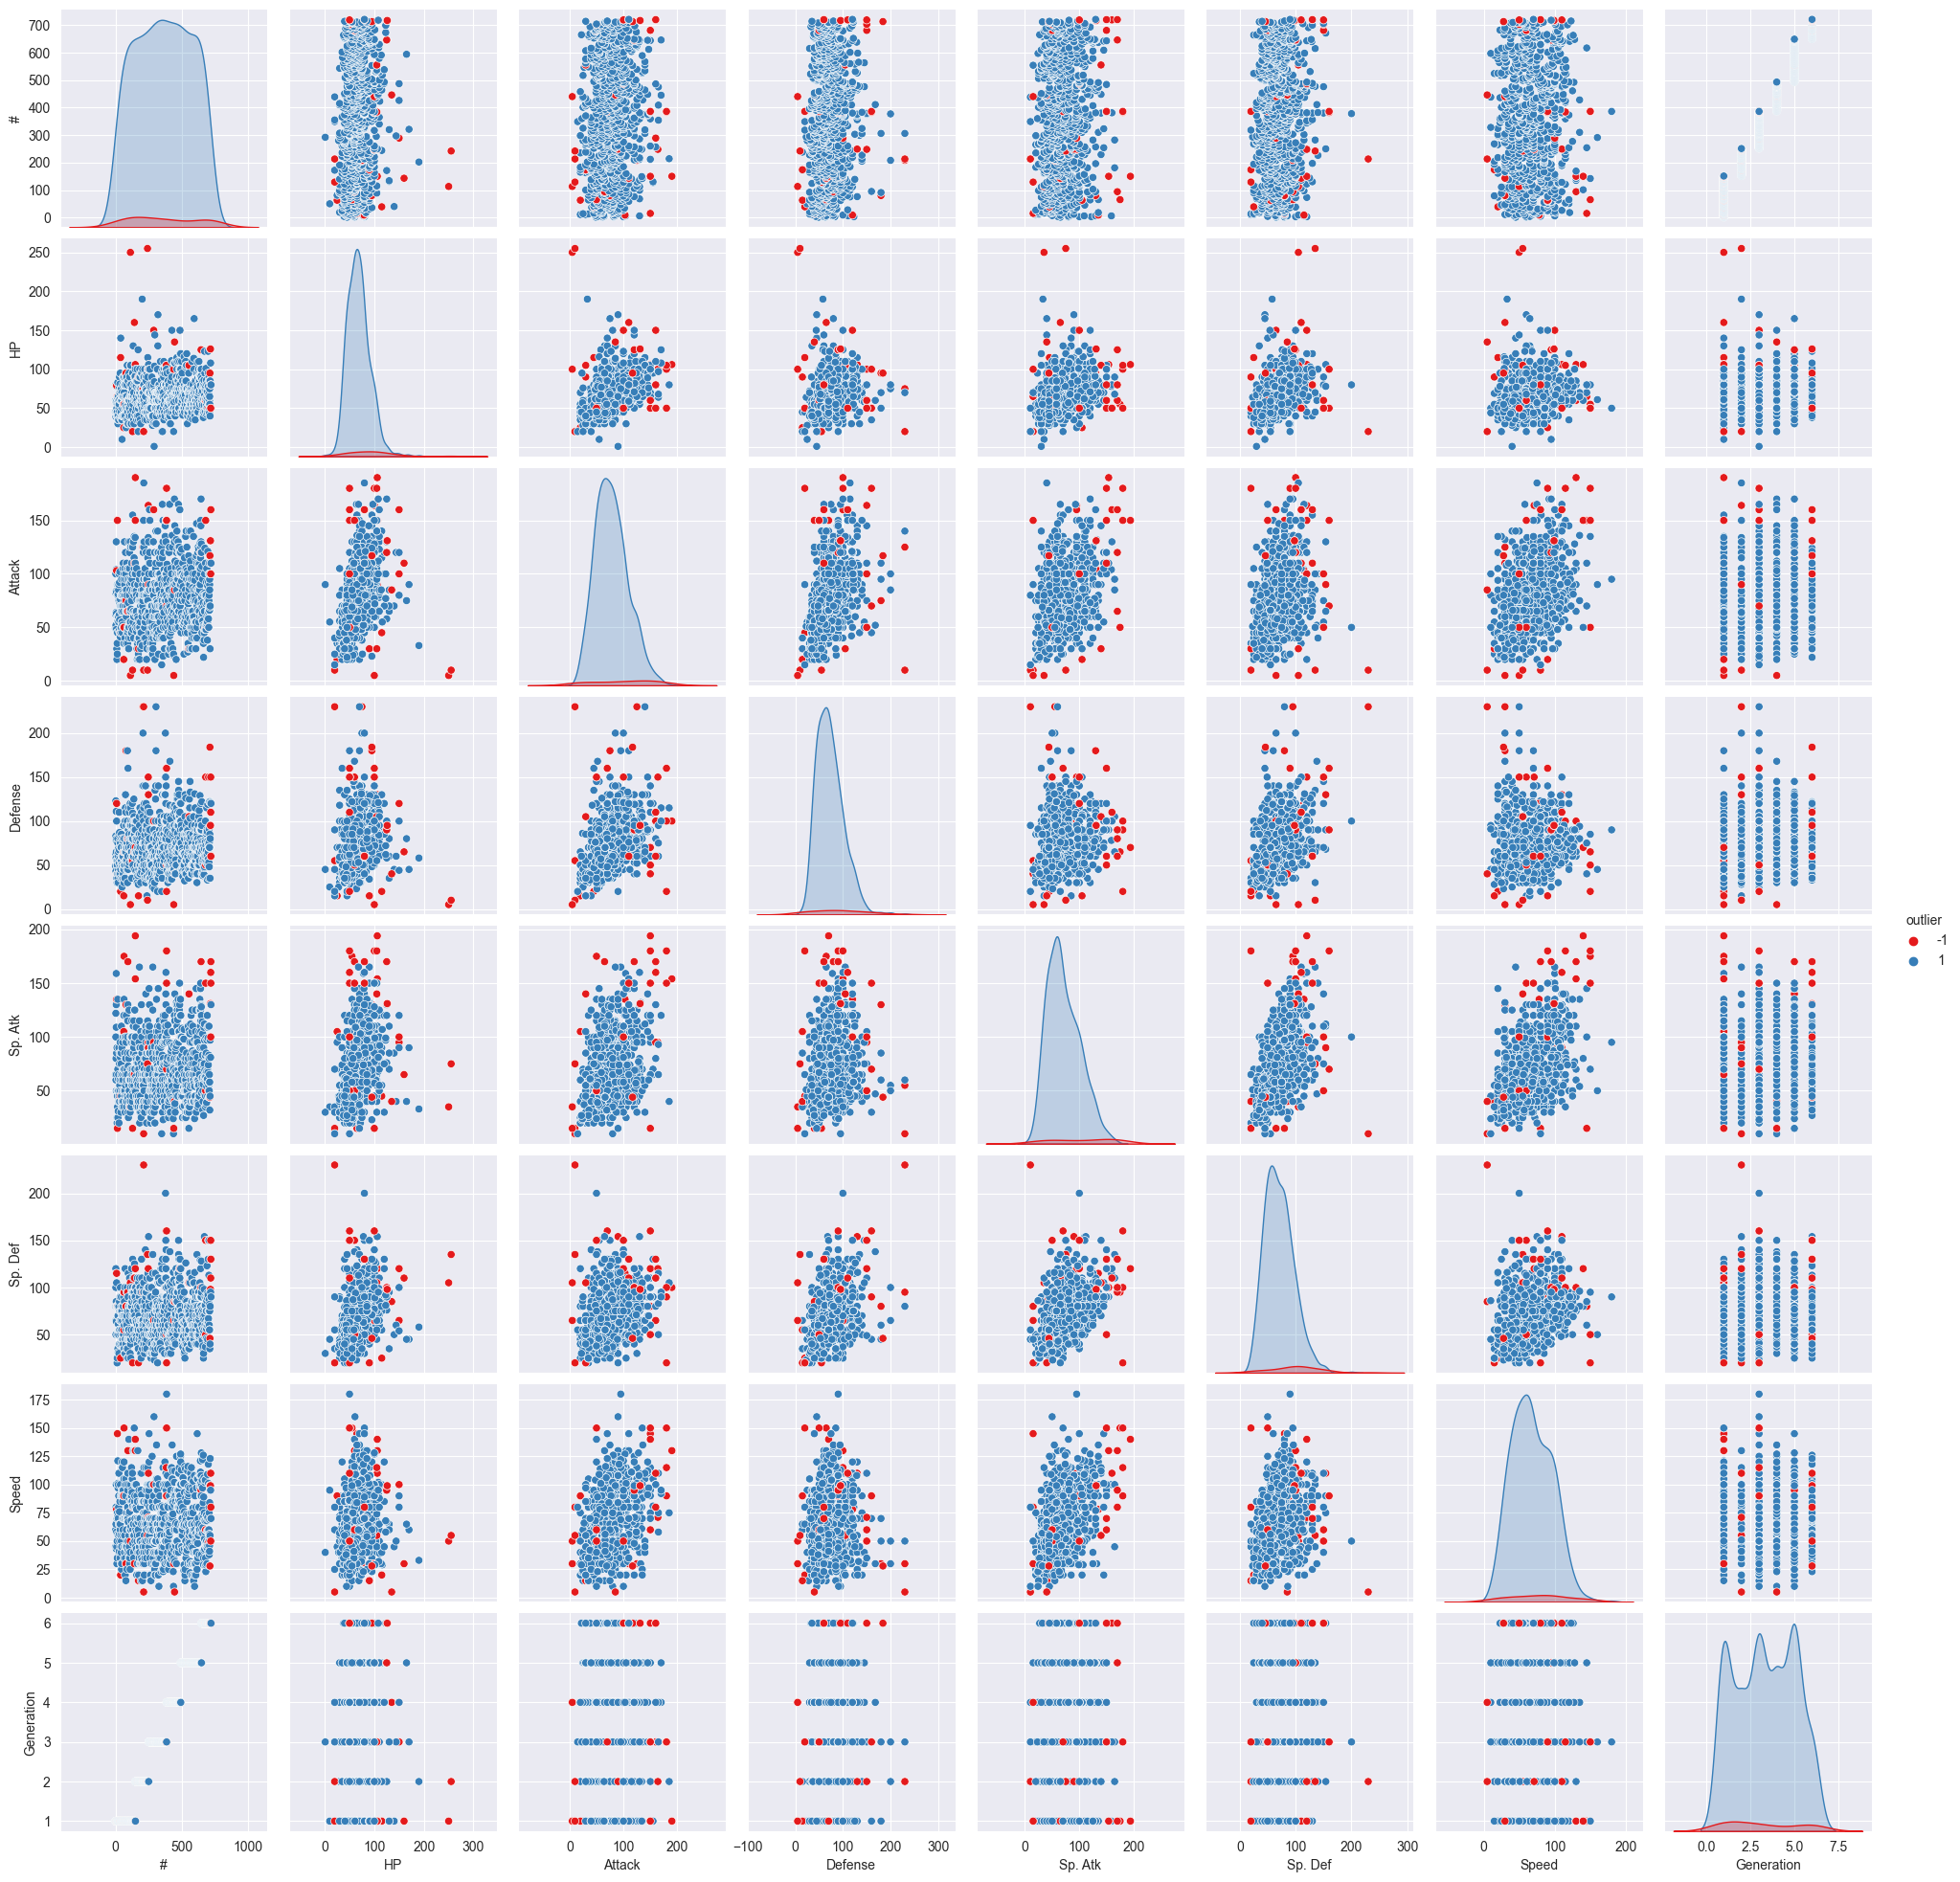

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
# Get the list of numeric column names
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Create the pair plot using seaborn
sns.pairplot(df[numeric_columns], hue='outlier', palette='Set1')

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model on the numeric columns
model.fit(df[numeric_columns])

# Predict the outliers
df['outlier'] = model.predict(df[numeric_columns])

# Filter out the outliers
outliers = df[df['outlier'] == -1]

# Mark the outliers on the pair plot
#sns.scatterplot(x='Attack', y='Defense', data=outliers, color='red', marker='x')

# Show the plot
plt.show()

In [63]:
# Mark the outliers on the pair plot# Get the list of numeric column names
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model on the numeric columns
model.fit(df[numeric_columns])

# Predict the outliers
df['outlier'] = model.predict(df[numeric_columns])

# Use hvplot to create the scatter plot
plot = df.hvplot.scatter(x='Attack', y='Defense', by='Name', c='Name', cmap='Set1', colorbar=True, size=10)

# Filter out the outliers
outliers = df[df['outlier'] == -1]

# Add the outliers as a separate scatter plot with a different color and marker
outliers_plot = outliers.hvplot.scatter(x='Attack', y='Defense', marker='x', color='red', size=15)

# Combine the plots using the '+' operator
final_plot = plot + outliers_plot

# Show the plot
final_plot

/Users/ivysuar/PycharmProjects/PokemonBalance/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


:Layout
   .NdOverlay.I :NdOverlay   [Name]
      :Scatter   [Attack]   (Defense,Name)
   .Scatter.I   :Scatter   [Attack]   (Defense)